# Iranian Tweet EDA and Topic Modeling

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import string
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

### Data Filtering

In [2]:
data = pd.read_csv('data/iranian_tweets.csv')

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1122936 entries, 0 to 1122935
Data columns (total 31 columns):
tweetid                     1122936 non-null int64
userid                      1122936 non-null object
user_display_name           1122936 non-null object
user_screen_name            1122936 non-null object
user_reported_location      887669 non-null object
user_profile_description    995845 non-null object
user_profile_url            434954 non-null object
follower_count              1122936 non-null int64
following_count             1122936 non-null int64
account_creation_date       1122936 non-null object
account_language            1122936 non-null object
tweet_language              1117307 non-null object
tweet_text                  1122936 non-null object
tweet_time                  1122936 non-null object
tweet_client_name           1100078 non-null object
in_reply_to_tweetid         339350 non-null float64
in_reply_to_userid          440244 non-null object
quoted_twe

In [3]:
df = data[['userid','tweet_language','tweet_text','is_retweet','hashtags']]

In [4]:
df = df[(df.is_retweet==False)&(df.tweet_language=='en')]

### Tokenize & Lemmatize, Remove Punctuation

In [5]:
# Tfidf vectorizer takes care of stop words; it's on us to remove links, punctuation (can include in token pattern?)

In [63]:
punc = set(string.punctuation+'‘’…°–—“”')
lem = nltk.stem.WordNetLemmatizer()
twt = TweetTokenizer(reduce_len=True, strip_handles=True)

def tweet_tokenize_full(tweet):
    tokens = twt.tokenize(tweet)
    no_punc = [token for token in tokens if (token[0] not in punc) and (len(token)>2)]
    no_links = [token for token in no_punc if token[0:4]!='http']
    lemmatized = [lem.lemmatize(token) for token in no_links]
    return lemmatized

In [94]:
num_feats = 1000
ngrams = (1,1)
vctr = TfidfVectorizer(analyzer='word',
                       stop_words='english',
                       tokenizer=tweet_tokenize_full,
                       max_features=num_feats,
                       ngram_range=ngrams)

In [ ]:
X = vctr.fit_transform(df.tweet_text)

In [ ]:
tfidf_vals = X.toarray()

In [ ]:
feature_names = np.array(vctr.get_feature_names())

In [ ]:
tfidf_results = pd.DataFrame(data = tfidf_vals, columns=feature_names)

In [ ]:
n_components = 5
nmf = NMF(n_components=n_components, random_state=1, alpha=0.1, solver='mu', max_iter=1000, l1_ratio=0.5).fit(X)

In [ ]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        print("Topic #{0}: \n{1}\n".format(topic_idx, top_words))
    print()

In [ ]:
n_top_words = 15
print_top_words(nmf, feature_names, n_top_words)

## Russia Time

In [3]:
rus_df = pd.read_csv('data/ira_tweets.csv',nrows=100000)

C:\Users\alexg\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
rus_df.sample(10)

,tweetid,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,...,latitude,longitude,quote_count,reply_count,like_count,retweet_count,hashtags,urls,user_mentions,poll_choices
25057,761127697414098944,2532611755,Kathie,KathieMrr,Atlanta,"Imperfection is beauty, madness is genius and ...",NaN,6709,5606,2014-05-29,...,NaN,NaN,0.0,0.0,1.0,0.0,[ThingsToDoInAWaitingRoom],[],NaN,NaN
67000,668764746619953152,e2218e53cd1fc506d06955fb3076e395ae227d634b3207...,e2218e53cd1fc506d06955fb3076e395ae227d634b3207...,e2218e53cd1fc506d06955fb3076e395ae227d634b3207...,Казань,NaN,NaN,354,488,2013-12-26,...,NaN,NaN,0.0,0.0,0.0,0.0,[],[http://vesti.ru/t?2690072],[72525490],NaN
24252,602866978869551105,2570574680,РИА ФАН,riafanru,Россия,Федеральное агентство новостей ВКонтакте: http...,http://t.co/tcKe2jsuqw,15753,6862,2014-06-16,...,NaN,NaN,0.0,0.0,0.0,2.0,[],[http://riafan.ru/289049-novosti-novorossii-s-...,NaN,NaN
54471,531053563620118530,6afabf04a71b1ba2beb3e9b8b2786b7b6a7f6f4019f154...,6afabf04a71b1ba2beb3e9b8b2786b7b6a7f6f4019f154...,6afabf04a71b1ba2beb3e9b8b2786b7b6a7f6f4019f154...,МSK,"Общественный деятель, зам. председателя молоде...",NaN,455,1578,2014-06-08,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,[http://pavnodiuzov.livejournal.com/84470.html],NaN,NaN
62853,783235979629002752,0945c828c3f3fa4064a6e67cbaa1c15827f6de9f3f9e69...,0945c828c3f3fa4064a6e67cbaa1c15827f6de9f3f9e69...,0945c828c3f3fa4064a6e67cbaa1c15827f6de9f3f9e69...,USA,#hashtagwarrior and your mom knows it!,NaN,3673,4700,2014-05-29,...,NaN,NaN,0.0,0.0,0.0,0.0,[unlikelythingsheardatwalmart],[],NaN,NaN
97299,585532550547898368,1240007161,Замполит,ComradZampolit,Москва (СССР - Россия),"Глава общественной организации ""АгитПолк"" /// ...",https://t.co/W2Cq3uYUL6,48912,1797,2013-03-03,...,NaN,NaN,0.0,0.0,0.0,1.0,[],[],[338960856],NaN
24904,862715488115105794,a95a911dd6ae864c48ed062cdbe75e5c28dbe0cf57c6db...,a95a911dd6ae864c48ed062cdbe75e5c28dbe0cf57c6db...,a95a911dd6ae864c48ed062cdbe75e5c28dbe0cf57c6db...,United States,No more #HappyHolidays shit!!! It's #MerryChri...,https://t.co/XFnhCqCWBy,2748,265,2016-06-15,...,NaN,NaN,0.0,0.0,0.0,0.0,"[MAGA, TrumpTrain, Russia, TrumpsArmy]",[https://twitter.com/uthornsrawk/status/862714...,[2746979823],NaN
62518,488353185380438016,aa185e9a161da2b5a785f70c37b14dcb960b139b1a238d...,aa185e9a161da2b5a785f70c37b14dcb960b139b1a238d...,aa185e9a161da2b5a785f70c37b14dcb960b139b1a238d...,NaN,главное в людях - чувство юмора и наличие пульса,NaN,263,337,2013-12-30,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,[http://ppogresseo.livejournal.com/68414.html],NaN,NaN
95700,842622087596523520,5cabae0aeac6932ac568a48cac2084dcf57313479366c0...,5cabae0aeac6932ac568a48cac2084dcf57313479366c0...,5cabae0aeac6932ac568a48cac2084dcf57313479366c0...,"Berlin, Deutschland",Lokale Nachrichten aus Berlin. Hier kannst Du ...,NaN,1852,2228,2016-04-27,...,NaN,NaN,0.0,0.0,0.0,0.0,[],[http://www.morgenpost.de/berlin/article209958...,NaN,NaN
55334,805846162305597440,4224729994,Tennessee,TEN_GOP,NaN,Unofficial Twitter of Tennessee Republicans. C...,NaN,147767,74664,2015-11-19,...,NaN,NaN,27.0,27.0,574.0,583.0,[],[],NaN,NaN


In [51]:
list(rus_df.columns)

['tweetid',
 'userid',
 'user_display_name',
 'user_screen_name',
 'user_reported_location',
 'user_profile_description',
 'user_profile_url',
 'follower_count',
 'following_count',
 'account_creation_date',
 'account_language',
 'tweet_language',
 'tweet_text',
 'tweet_time',
 'tweet_client_name',
 'in_reply_to_tweetid',
 'in_reply_to_userid',
 'quoted_tweet_tweetid',
 'is_retweet',
 'retweet_userid',
 'retweet_tweetid',
 'latitude',
 'longitude',
 'quote_count',
 'reply_count',
 'like_count',
 'retweet_count',
 'hashtags',
 'urls',
 'user_mentions',
 'poll_choices']

### User Following Analysis

In [53]:
rus_users_grouper = rus_df.groupby('userid')
rus_users = rus_users_grouper.mean()
rus_users

,tweetid,follower_count,following_count,in_reply_to_tweetid,quoted_tweet_tweetid,is_retweet,retweet_tweetid,latitude,longitude,quote_count,reply_count,like_count,retweet_count
userid,,,,,,,,,,,,,
004c1875a5f3a8ddfd2044b857a81c5d458882ac5cdf673d4e1840ca1ae476fa,503643272771906944,63,77,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
005b6c0f7e3371b1cacced2890fead3d5543694ab213727242ccc0184f67d29d,670041735234351104,112,153,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
00b6194ca3359e2f37000037e20223ee91cfffcf15c7b929d5d37226a2465416,573483183898574848,181,255,NaN,NaN,1.000000,5.734824e+17,NaN,NaN,0.000000,0.000000,0.000000,0.000000
00bd49f19d4096b1f47e6e7702dddd746cf7021795f2349f42b64003dcb48638,597592461111051648,71,81,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
00e1726daf96a4451c536ef5c891263b8e306d32ddf8c396bb732a3cb141d284,608308139192327040,164,348,6.285799e+17,NaN,0.794872,6.219686e+17,NaN,NaN,0.000000,0.000000,0.000000,0.000000
00e60b6efcc4135bb73e81ba1e385786894899da0a9633120c538e24e290f8a0,546850963458356928,41,302,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.142857,0.000000
010659f988d882af388da498e705d5d49d1540211f9955edf6f6987c5cb49268,510081376893562880,70,142,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
010de99355dc8d0b6987270bace242b49d272ad7a94abf0dbbcd456f9e6877b3,558865820189126656,79,35,NaN,NaN,0.222222,5.968728e+17,NaN,NaN,0.000000,0.000000,0.000000,0.000000
011d362295d5044009ce60de6c9ff2c329c1f035500fdf110edede0b1b65c318,804435981290841984,133,305,NaN,8.138004e+17,0.980000,8.041490e+17,NaN,NaN,0.000000,0.000000,0.000000,0.540000


(0, 150000)

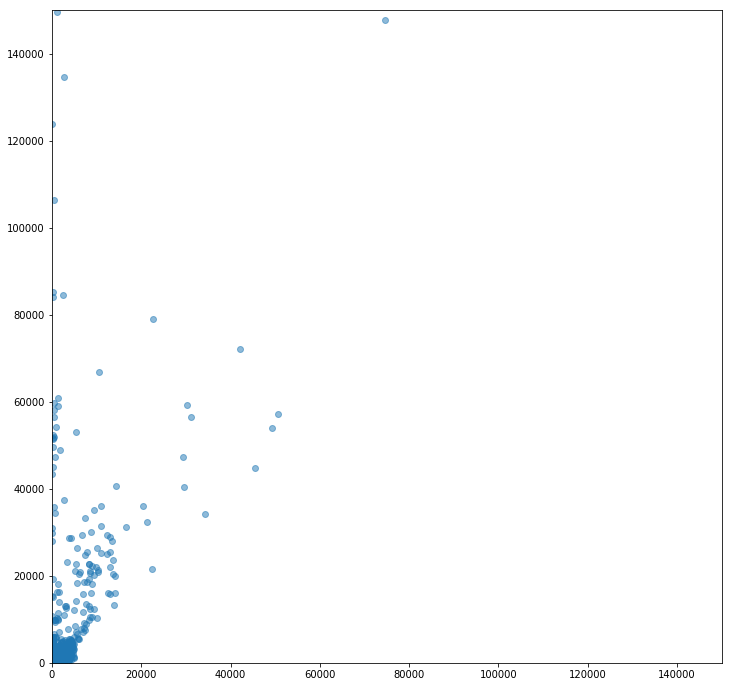

In [92]:
plt.figure(figsize=(12,12))
plt.scatter(rus_users['following_count'],rus_users['follower_count'],alpha=0.5)
plt.xlim(0,150000)
plt.ylim(0,150000)

In [5]:
rus_df_filt = rus_df[(rus_df.is_retweet==False)&(rus_df.tweet_language=='en')]
rus_df_filt = rus_df_filt[['userid','tweet_text','is_retweet','hashtags','urls']]

rus_df_filt.sample(10)

,userid,tweet_text,is_retweet,hashtags,urls
72158,2611151319,"Top high school basketball performers, Jan. 29...",False,[sports],[]
30473,bc1e9ff0868dd5b651e8a25c3cf98ffd3046f3484317ad...,This was less sexy than I had hoped https://t....,False,[],[https://vine.co/v/OYHdWHaeFVl]
15078,bf9dba91bbd72a2145c1e8c620d811f22c416501ec495f...,#FukushimaAgain There`s an emergency situation...,False,[FukushimaAgain],[]
88184,2495567768,Students’ upset about bullying devised plot to...,False,[news],[]
26268,eb717d6e86e610e614145396f4882366370ec4f2a73923...,"Trump Defends Life, Hillary Partial Birth #Abo...",False,"[Abortion, MAGA, PJNET, TCOT]",[http://bit.ly/2eEWfvO]
40182,cc19cd3fba790e5aa198cc54d51c6fc7fa022d16ffdaf8...,VIRAL VIDEO : HILARIOUS PARODY “The Hunt for H...,False,[],[http://viid.me/qw9MVN]
73517,6267a95063fe47b02c35cae310775557ef694ccbdfdcb8...,Petition DEMANDS ARREST of Senator Who Called ...,False,[],[http://ift.tt/2xboA6b]
92006,a7e66c2c8b0ea83b084c62470e9b5a7eabe82ef201c07b...,"Man is not what he thinks he is, he is what he...",False,NaN,NaN
27399,8cd6774724c40801bccd8cfa0e1fe42128aa5f132686ff...,Age is no guarantee of maturity. - Lawana Blac...,False,"[quote, true]",NaN
74937,60f0b63e612aa72961a991ed83ad3318ccaa22f9c343ea...,http://t.co/gOFPdwJ8hV That shit fie and she g...,False,[],[http://www.ImageEra.com/That-shit-fie-and-she...


In [6]:
rus_df_filt.loc[80841]['tweet_text']

"Can't sleep so:   Loving,Beautiful,Can't be replaced #Momin5words #rip"

In [7]:
rus_df_filt.sample(100)

,userid,tweet_text,is_retweet,hashtags,urls
36176,2882037326,#IHatePokemonGoBecause they said to me they fo...,False,[IHatePokemonGoBecause],[]
12945,2743327187,#news AAA Receives Record Number of Calls Amid...,False,[news],[]
79567,533bd35fdbbec65d406b13a6a6e128c0604f41a8e9c1bd...,Supreme Court Justice #ObamaNextJob,False,[ObamaNextJob],[]
97256,87a4a47fd06dcadfdd84e02849dd9e059ad3cd2b1cec36...,#chanlePigs are FLYING! CNN Just took Presiden...,False,[chanlePigs],[http://ift.tt/2fmdkQw]
37149,36f2768e6fcac2041cd5604315cab62bc02c808f1ddb34...,"Falling for someone is easy, getting back up a...",False,[],[]
34438,2611151319,American Pharoah ends racing career by romping...,False,[sports],[]
98832,0ba7b20ac6f6508ed2189050961f219b62ab06da5ed1aa...,Birthday selfie ??? via @brisalazar10 http://t...,False,[],[http://www.GoodSelfie.Club/Selfie/2015/06/12/...
91784,034e6c5e16aab6dcb5994b9583ae46c9b6757a8053e3a8...,#top RT ShaneTHazel: https://t.co/v5jBCs2ai0,False,[top],[http://fb.me/820yrrKFM]
93741,9d08c8b245d92ea4fa33bf3ac99f6b7e2e987068f8f7be...,Nothing is so hard for those who abound in ric...,False,NaN,NaN
66353,60f0b63e612aa72961a991ed83ad3318ccaa22f9c343ea...,Emerging Stocks Sink on Greece Fears as China ...,False,[],[http://www.Stocks.Band/RichardGEarl]


In [8]:
rus_df_filt.fillna('',inplace=True)
grouper = rus_df_filt.groupby('userid').agg(list)
list(grouper.tweet_text.values)[100:200]

### Observations / patterns
Specific
* Some accounts almost exclusively retweet; need to compare to regular users
* Frequent link sharing (proxy for retweeting, possibly optimizing follower growth)
* Short, pithy quotes, often ending in - or ~ and quote attribution

General
* Hashtags that are offtopic for tweets (large distance between tweet content in 'tweet2vec' space from 'hashtag2vec', aggregated by user account)
* Tweets that are off topic from each other (large distance in net 'tweet2vec' space between user's tweets; counts for retweets as well)
* Tweets with inconsistent grammatical structure or vocabulary (different function word usage between tweets by user)
* Spamlike hashtag or linking behavior between tweets (tfidf shows high term frequency for link and hashtag strings across user's tweet corpus)

### EDA on political tweets dataset

In [13]:
political_tweets = pd.read_csv('data/political_social_media.csv', encoding = "ISO-8859-1")

In [15]:
list(political_tweets.columns)

['_unit_id',
 '_golden',
 '_unit_state',
 '_trusted_judgments',
 '_last_judgment_at',
 'audience',
 'audience:confidence',
 'bias',
 'bias:confidence',
 'message',
 'message:confidence',
 'orig__golden',
 'audience_gold',
 'bias_gold',
 'bioid',
 'embed',
 'id',
 'label',
 'message_gold',
 'source',
 'text']

In [18]:
list(political_tweets.sample(100).text.values)

["For 3 mos. the IRS failed to tell Congress they couldn't provide Lerner emails. My speech abt need for accountability:http://t.co/spq6b3D5nW",
 "Great start to my day. Got a visit from Mr. Chandler's Hart Elementary School class. They visited the district office and even got to chat with my DC staff via video chat. They had a great time and I enjoyed answering their questions about my work representing El Paso.",
 "Don't forget to subscribe to me on YouTube to keep up with my speeches and the videos I record to respond to questions that Northern Californians email me! Click here: http://youtube.com/subscription_center?add_user=RepHuffman",
 'There are less than 50 days until the Health Care Marketplaces Exchanges open for enrollment. The changes already in place have proven to be a huge success. Health premiums are rising at the slowest rate in decades, insurers can no longer deny coverage to the millions of children with preexisting conditions and 10,400 seniors in our congressional

In [25]:
test_df = pd.read_json('data/twitter-2018-05-08/2018/05/08/01/00.json', lines=True)

In [43]:
tweets_df = pd.DataFrame()
for i in range(0,10):
    temp_df = pd.read_json('data/twitter-2018-05-08/2018/05/08/01/0{}.json'.format(i), lines=True)
    tweets_df = pd.concat([tweets_df,temp_df],sort=True)
for i in range(10,58):
    temp_df = pd.read_json('data/twitter-2018-05-08/2018/05/08/01/{}.json'.format(i), lines=True)
    tweets_df = pd.concat([tweets_df,temp_df],sort=True)  
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196805 entries, 0 to 2366
Data columns (total 37 columns):
contributors                 0 non-null float64
coordinates                  109 non-null object
created_at                   100969 non-null datetime64[ns]
delete                       95836 non-null object
display_text_range           22725 non-null object
entities                     100969 non-null object
extended_entities            23463 non-null object
extended_tweet               5874 non-null object
favorite_count               100969 non-null float64
favorited                    100969 non-null float64
filter_level                 100969 non-null object
geo                          109 non-null object
id                           100969 non-null float64
id_str                       100969 non-null float64
in_reply_to_screen_name      16852 non-null object
in_reply_to_status_id        15675 non-null float64
in_reply_to_status_id_str    15675 non-null float64
in_reply_to

In [44]:
eng_tweets = tweets_df[tweets_df['lang']=='en']
eng_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27363 entries, 0 to 2355
Data columns (total 37 columns):
contributors                 0 non-null float64
coordinates                  42 non-null object
created_at                   27363 non-null datetime64[ns]
delete                       0 non-null object
display_text_range           5365 non-null object
entities                     27363 non-null object
extended_entities            6684 non-null object
extended_tweet               2231 non-null object
favorite_count               27363 non-null float64
favorited                    27363 non-null float64
filter_level                 27363 non-null object
geo                          42 non-null object
id                           27363 non-null float64
id_str                       27363 non-null float64
in_reply_to_screen_name      3358 non-null object
in_reply_to_status_id        3081 non-null float64
in_reply_to_status_id_str    3081 non-null float64
in_reply_to_user_id          3

In [46]:
list(eng_tweets.text.values)

['Pandora is kinda shady but the ultimate weapon.',
 'RT @hrw: Facebook Live today: \n \nEthnic Cleansing in Myanmar Demands UN Security Council Action, \n \n11am EDT\n \nhttps://t.co/jwdF77HOlI http…',
 '🇪🇬📈 How can the Reds get Salah back to top form?\n\nhttps://t.co/jJqDNjDp4j',
 'Congratulations to all the winners this year.\n\nhttps://t.co/7re5KK1HSn',
 'Properly prioritizing contacts for #sales reps using #AI can translate into better performance https://t.co/olGPGzG35E #NavikSalesAI',
 'I JUST WANT BLONDE JUNGKOOK PLZ @BigHitEnt PLZZZZ https://t.co/p9FBG159F2',
 'RT @najwazebian: Be a light for someone today.',
 '@abbiegbrock thank you chAmp so have you!!!!!!',
 'RT @radiodisney: RT to vote for #BTS “Mic Drop (@steveaoki Remix)” for #WhenTheBeatDrops! @radiodisney #RDMA @bts_bighit @BTS_twt https://t…',
 "@Argoedblue @CardiffCityFC Was a long time ago and he was playing for Arsenal..!! He's a good solid centre half wit… https://t.co/lBgKr4BFJB",
 'Breakfast briefing. Smile 😄 htt

### Notes on user accounts

In [78]:
list(eng_tweets['user'].values[:10])
'''
real people user account data (example):
{ 'id'
  'name': 'Claptrap',
  'screen_name': 'ECHOcasts_ebook',
  'location': None,
  'description': 'I can see… the code',
  'url': None,
  'followers_count': 35,
  'friends_count': 14,
  'statuses_count': 16506,
  'created_at': 'Sat Mar 19 17:12:51 +0000 2016',
  'lang': 'fr',}

comparable IRA account data:
 'userid',
 'user_display_name',
 'user_screen_name',
 'user_reported_location',
 'user_profile_description',
 'user_profile_url',
 'follower_count',
 'following_count',
 # impute statuses count
 'account_creation_date',
 'account_language',

[{'id': 711239020408340480,
  'id_str': '711239020408340480',
  'name': 'Claptrap',
  'screen_name': 'ECHOcasts_ebook',
  'location': None,
  'url': None,
  'description': 'I can see… the code',
  'translator_type': 'none',
  'protected': False,
  'verified': False,
  'followers_count': 35,
  'friends_count': 14,
  'listed_count': 4,
  'favourites_count': 1,
  'statuses_count': 16506,
  'created_at': 'Sat Mar 19 17:12:51 +0000 2016',
  'utc_offset': None,
  'time_zone': None,
  'geo_enabled': False,
  'lang': 'fr',
  'contributors_enabled': False,
  'is_translator': False,
  'profile_background_color': 'F5F8FA',
  'profile_background_image_url': '',
  'profile_background_image_url_https': '',
  'profile_background_tile': False,
  'profile_link_color': '1DA1F2',
  'profile_sidebar_border_color': 'C0DEED',
  'profile_sidebar_fill_color': 'DDEEF6',
  'profile_text_color': '333333',
  'profile_use_background_image': True,
  'profile_image_url': 'http://pbs.twimg.com/profile_images/71124099

In [79]:
def get_user_data(row):
    row['userid'] = row['user']['id']
    row['follower_count'] = row['user']['followers_count']
    row['following_count'] = row['user']['friends_count']
    return row
    
eng_users = eng_tweets.apply(get_user_data, axis=1)
eng_users.sample(10)

,contributors,coordinates,created_at,delete,display_text_range,entities,extended_entities,extended_tweet,favorite_count,favorited,...,retweeted_status,source,text,timestamp_ms,truncated,user,withheld_in_countries,userid,follower_count,following_count
610,,,2018-05-08 07:50:10,,,"{'hashtags': [{'text': 'AngLiksiNgBAGANI', 'in...",,,0.0,0.0,...,{'created_at': 'Tue May 08 05:18:30 +0000 2018...,"<a href=""http://twitter.com/download/android"" ...",RT @al90337493: Unite as one #AngLiksiNgBAGANI,2018-05-08 07:50:10.660,0.0,"{'id': 733193545704603648, 'id_str': '73319354...",,733193545704603648,133,208
1826,,,2018-05-08 07:31:21,,"[0, 61]","{'hashtags': [], 'urls': [{'url': 'https://t.c...",,,0.0,0.0,...,,"<a href=""http://twitter.com/download/android"" ...","Porsche or not, You need a man that can hype y...",2018-05-08 07:31:21.664,0.0,"{'id': 299871769, 'id_str': '299871769', 'name...",,299871769,875,713
757,,,2018-05-08 07:51:18,,,"{'hashtags': [], 'urls': [], 'user_mentions': ...","{'media': [{'id': 993677243388841984, 'id_str'...",,0.0,0.0,...,{'created_at': 'Tue May 08 02:22:16 +0000 2018...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @enzeru_no_innen: SHINee's #1 Fanboy has sp...,2018-05-08 07:51:18.662,0.0,"{'id': 240583707, 'id_str': '240583707', 'name...",,240583707,1283,760
1782,,,2018-05-08 07:17:56,,,"{'hashtags': [], 'urls': [], 'user_mentions': ...",,,0.0,0.0,...,{'created_at': 'Tue May 08 04:51:46 +0000 2018...,"<a href=""http://twitter.com/download/android"" ...",RT @KeoneMadrid: Bts fans’ love is unreal. It ...,2018-05-08 07:17:56.664,0.0,"{'id': 4859536973, 'id_str': '4859536973', 'na...",,4859536973,11263,254
1450,,,2018-05-08 07:27:44,,,{'hashtags': [{'text': 'EXOrDIUMdotinSeoulDay2...,,,0.0,0.0,...,{'created_at': 'Sun May 28 11:27:41 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",RT @jjonqins: 170528 #EXOrDIUMdotinSeoulDay2 \...,2018-05-08 07:27:44.663,0.0,"{'id': 18833293, 'id_str': '18833293', 'name':...",,18833293,233,433
4333,,,2018-05-08 07:45:46,,,"{'hashtags': [], 'urls': [], 'user_mentions': ...",,,0.0,0.0,...,{'created_at': 'Tue May 08 00:11:48 +0000 2018...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @ALDUB_Joy25: I have been impressed with th...,2018-05-08 07:45:46.665,0.0,"{'id': 4874244671, 'id_str': '4874244671', 'na...",,4874244671,161,83
683,,,2018-05-08 07:49:15,,,"{'hashtags': [], 'urls': [], 'user_mentions': ...","{'media': [{'id': 993509664410296320, 'id_str'...",,0.0,0.0,...,{'created_at': 'Mon May 07 15:16:22 +0000 2018...,"<a href=""http://twitter.com/download/iphone"" r...",RT @swag_lukarz: Nigga thought he's getting a ...,2018-05-08 07:49:15.664,0.0,"{'id': 2459955165, 'id_str': '2459955165', 'na...",,2459955165,348,69
1083,,,2018-05-08 07:06:30,,,"{'hashtags': [], 'urls': [], 'user_mentions': ...","{'media': [{'id': 993739625029165057, 'id_str'...",,0.0,0.0,...,{'created_at': 'Tue May 08 06:29:25 +0000 2018...,"<a href=""http://twitter.com/download/iphone"" r...",RT @SourceStyles: djaybuddah: ❤️ harrystyles ❤...,2018-05-08 07:06:30.660,0.0,"{'id': 800199491412324352, 'id_str': '80019949...",,800199491412324352,1190,228
1698,,,2018-05-08 07:00:41,,,"{'hashtags': [{'text': 'Health', 'indices': [0...",,"{'full_text': '#Health In veterans, even a mil...",0.0,0.0,...,,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...","#Health In veterans, even a mild case of traum...",2018-05-08 07:00:41.659,1.0,"{'id': 837193879493332992, 'id_str': '83719387...",,837193879493332992,93,2
637,,,2018-05-08 07:09:19,,,"{'hashtags': [], 'urls': [], 'user_mentions': ...",,,0.0,0.0,...,{'created_at': 'Sun May 06 12:53:38 +0000 2018...,"<a href=""http://twitter.com/download/iphone"" r...",RT @AsiaChloeBrown: Yes. It’s completely non-s...,2018-05-08 07:09:19.659,0.0,"{'id': 942359256, 'id_str': '942359256', 'name...",,942359256,955,499


In [80]:
eng_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27363 entries, 0 to 2355
Data columns (total 40 columns):
contributors                 27363 non-null object
coordinates                  27363 non-null object
created_at                   27363 non-null datetime64[ns]
delete                       27363 non-null object
display_text_range           27363 non-null object
entities                     27363 non-null object
extended_entities            27363 non-null object
extended_tweet               27363 non-null object
favorite_count               27363 non-null float64
favorited                    27363 non-null float64
filter_level                 27363 non-null object
geo                          27363 non-null object
id                           27363 non-null float64
id_str                       27363 non-null float64
in_reply_to_screen_name      27363 non-null object
in_reply_to_status_id        27363 non-null object
in_reply_to_status_id_str    27363 non-null object
in_reply_to_u

In [82]:
eng_users_grouper = eng_users[['userid','follower_count','following_count','reply_count','retweeted','quote_count']].groupby('userid')
eng_users_grouped = eng_users_grouper.mean()

(0, 5000)

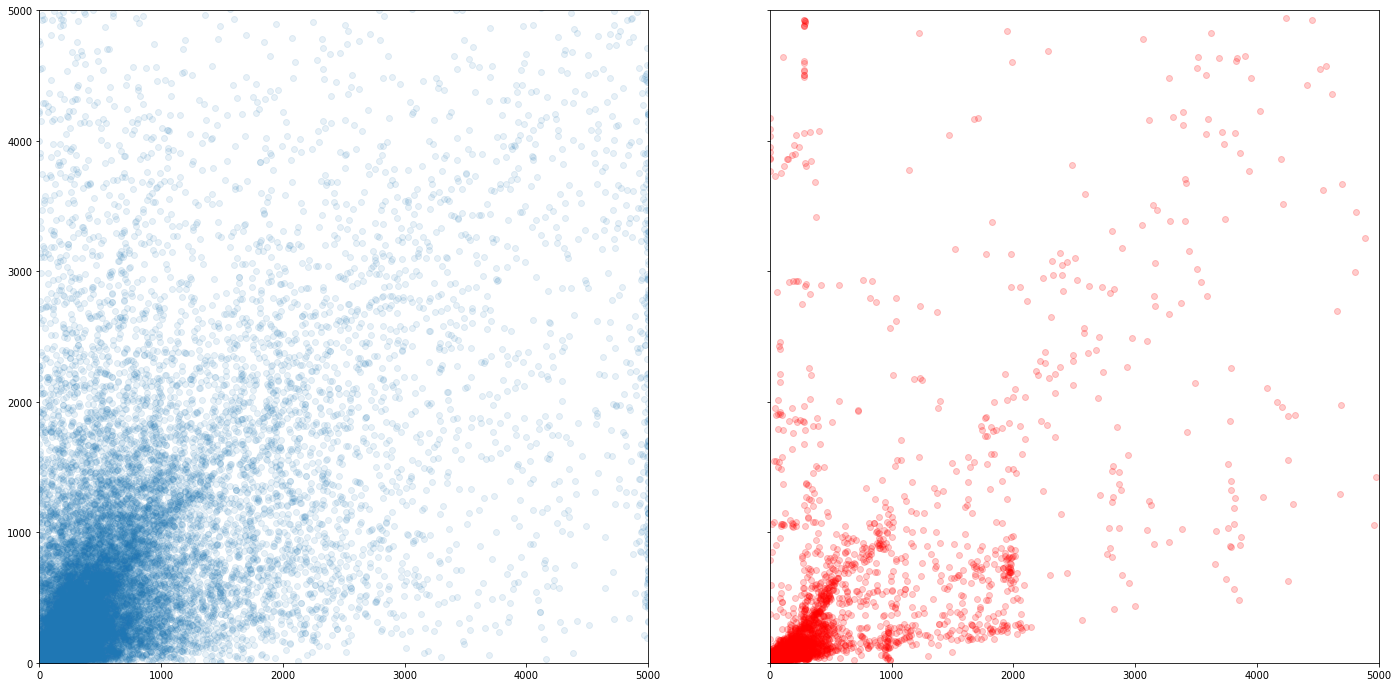

In [141]:
fig, axs = plt.subplots(1,2, sharey=True)
ax1 = axs[0]
ax2 = axs[1]
fig.set_figheight(12)
fig.set_figwidth(24)
ax1.scatter(eng_users_grouped['following_count'],eng_users_grouped['follower_count'],alpha=0.1)
ax2.scatter(rus_users['following_count'],rus_users['follower_count'],alpha=0.2, color='r')
ax1.set_xlim(0,5000)
ax2.set_xlim(0,5000)
ax1.set_ylim(0,5000)

### Define follower ratio

In [118]:
eng_users_grouped['follower_ratio'] = eng_users_grouped['follower_count']/(eng_users_grouped['following_count']+1)
rus_users['follower_ratio'] = rus_users['follower_count']/(rus_users['following_count']+1)

(array([414., 438., 386., 309., 347., 293., 128.,  77.,  49.,  41.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

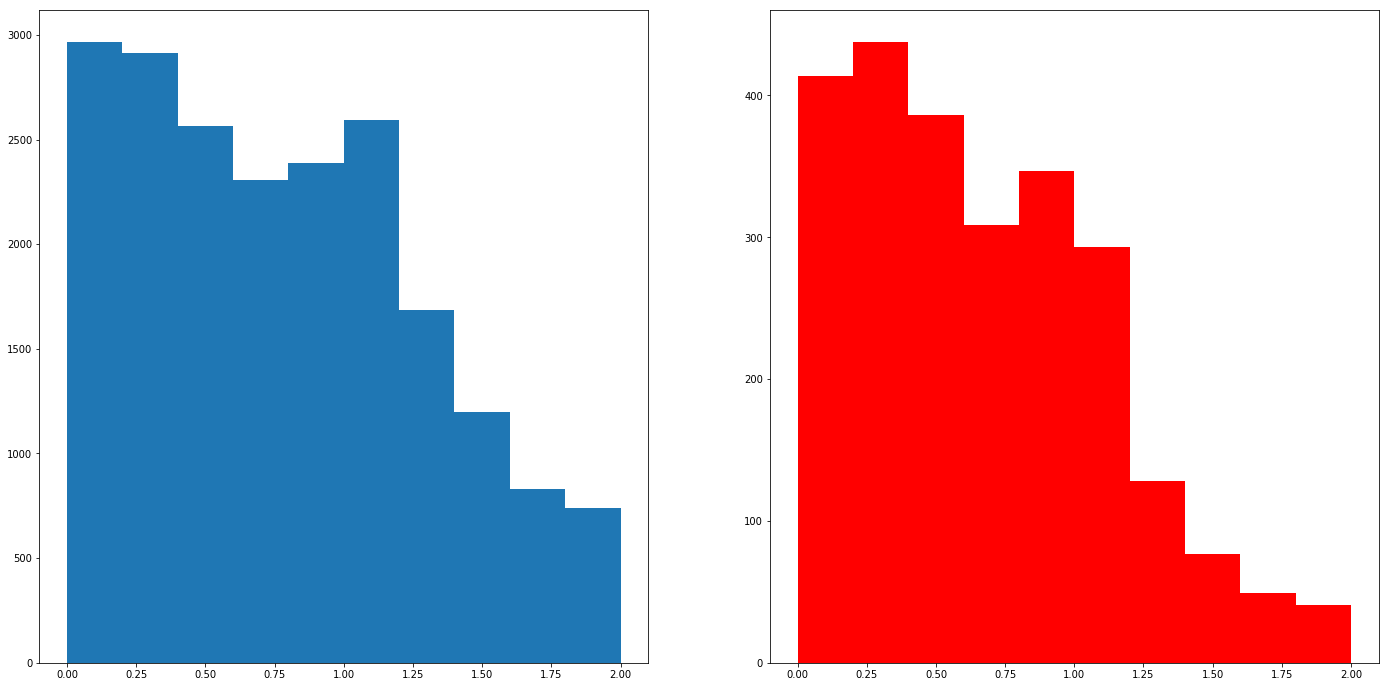

In [138]:
fig, axs = plt.subplots(1,2)
ax1 = axs[0]
ax2 = axs[1]
fig.set_figheight(12)
fig.set_figwidth(24)
ax1.hist(eng_users_grouped['follower_ratio'],bins=[0,.2,.4,.6,.8,1,1.2,1.4,1.6,1.8,2])
ax2.hist(rus_users['follower_ratio'],bins=[0,.2,.4,.6,.8,1,1.2,1.4,1.6,1.8,2], color='r')
# ax1.set_xscale('log')
# ax2.set_xscale('log')

In [122]:
eng_users_grouped['follower_ratio'].describe()

count    2.589000e+04
mean     5.221771e+02
std      7.282875e+04
min      0.000000e+00
25%      4.437641e-01
50%      9.854840e-01
75%      1.791667e+00
max      1.170138e+07
Name: follower_ratio, dtype: float64

In [123]:
rus_users['follower_ratio'].describe()

count     2866.000000
mean        36.813074
std        812.462316
min          0.000000
25%          0.321444
50%          0.730202
75%          1.160699
max      29750.000000
Name: follower_ratio, dtype: float64